[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1tayKZyBpQX0nswLEjX6f7smUwvHii6D9?usp=sharing)

# Text classification - IMDB Dataset

In [1]:
# here we installed the transformers and datasets libraries
!pip install transformers[sentencepiece] datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 521.2/521.2 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 18.9 MB/s eta 0:00:00


## Datasets library

In [2]:
from datasets import list_datasets
list_datasets()

<ipython-input-2-a55d55f678a9>:2: FutureWarning: list_datasets is deprecated and will be removed in the next major version of datasets. Use 'huggingface_hub.list_datasets' instead.
  list_datasets()


['acronym_identification',
 'ade_corpus_v2',
 'adversarial_qa',
 'aeslc',
 'afrikaans_ner_corpus',
 'ag_news',
 'ai2_arc',
 'air_dialogue',
 'ajgt_twitter_ar',
 'allegro_reviews',
 'allocine',
 'alt',
 'amazon_polarity',
 'amazon_reviews_multi',
 'amazon_us_reviews',
 'ambig_qa',
 'americas_nli',
 'ami',
 'amttl',
 'anli',
 'app_reviews',
 'aqua_rat',
 'aquamuse',
 'bigIR/ar_cov19',
 'ar_res_reviews',
 'ar_sarcasm',
 'arabic_billion_words',
 'arabic_pos_dialect',
 'arabic_speech_corpus',
 'arcd',
 'arsentd_lev',
 'art',
 'arxiv_dataset',
 'ascent_kb',
 'aslg_pc12',
 'asnq',
 'asset',
 'assin',
 'assin2',
 'atomic',
 'autshumato',
 'facebook/babi_qa',
 'banking77',
 'bbaw_egyptian',
 'bbc_hindi_nli',
 'bc2gm_corpus',
 'beans',
 'best2009',
 'bianet',
 'bible_para',
 'big_patent',
 'billsum',
 'bing_coronavirus_query_set',
 'biomrc',
 'biosses',
 'TheBritishLibrary/blbooks',
 'TheBritishLibrary/blbooksgenre',
 'blended_skill_talk',
 'blimp',
 'blog_authorship_corpus',
 'bn_hate_speech',


In [3]:
from datasets import load_dataset

imdb = load_dataset("imdb")
imdb

Generating train split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised split:   0%|          | 0/50000 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    unsupervised: Dataset({
        features: ['text', 'label'],
        num_rows: 50000
    })
})

- Similar to a python dictionary, where each key corresponds to a different split

In [4]:
imdb['train'][0]

{'text': 'I rented I AM CURIOUS-YELLOW from my video store because of all the controversy that surrounded it when it was first released in 1967. I also heard that at first it was seized by U.S. customs if it ever tried to enter this country, therefore being a fan of films considered "controversial" I really had to see this for myself.<br /><br />The plot is centered around a young Swedish drama student named Lena who wants to learn everything she can about life. In particular she wants to focus her attentions to making some sort of documentary on what the average Swede thought about certain political issues such as the Vietnam War and race issues in the United States. In between asking politicians and ordinary denizens of Stockholm about their opinions on politics, she has sex with her drama teacher, classmates, and married men.<br /><br />What kills me about I AM CURIOUS-YELLOW is that 40 years ago, this was considered pornographic. Really, the sex and nudity scenes are few and far be

In [5]:
imdb['test'][:3]

{'text': ['I love sci-fi and am willing to put up with a lot. Sci-fi movies/TV are usually underfunded, under-appreciated and misunderstood. I tried to like this, I really did, but it is to good TV sci-fi as Babylon 5 is to Star Trek (the original). Silly prosthetics, cheap cardboard sets, stilted dialogues, CG that doesn\'t match the background, and painfully one-dimensional characters cannot be overcome with a \'sci-fi\' setting. (I\'m sure there are those of you out there who think Babylon 5 is good sci-fi TV. It\'s not. It\'s clichéd and uninspiring.) While US viewers might like emotion and character development, sci-fi is a genre that does not take itself seriously (cf. Star Trek). It may treat important issues, yet not as a serious philosophy. It\'s really difficult to care about the characters here as they are not simply foolish, just missing a spark of life. Their actions and reactions are wooden and predictable, often painful to watch. The makers of Earth KNOW it\'s rubbish as

In [6]:
# reducing the dataset length to 2000 entries
imdb['train'] = imdb['train'].shuffle(seed=1).select(range(2000))
imdb['train']

Dataset({
    features: ['text', 'label'],
    num_rows: 2000
})

In [7]:
# Splitting for validation
imdb_train_validation = imdb['train'].train_test_split(train_size=0.8)
imdb_train_validation

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 1600
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 400
    })
})

In [8]:
imdb_train_validation['test']

Dataset({
    features: ['text', 'label'],
    num_rows: 400
})

In [9]:
imdb_train_validation['validation'] = imdb_train_validation.pop('test')
imdb_train_validation

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 1600
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 400
    })
})

In [12]:
# because the dataset is like a python dictionary, we can use the newly formed IMDB train, validation dataset
# and update the IMDB dataset with it
# this means we will overwrite any current splits of the dataset
# meand we rewrite the train and add new entry for validation
imdb.update(imdb_train_validation)
imdb

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 1600
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 400
    })
    unsupervised: Dataset({
        features: ['text', 'label'],
        num_rows: 50000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 400
    })
})

In [13]:
# Setting the test set for 400 entries
imdb['test'] = imdb['test'].shuffle(seed=1).select(range(400))
imdb['test']

Dataset({
    features: ['text', 'label'],
    num_rows: 400
})

In [14]:
# let's look at the unsupervised split
imdb['unsupervised'][:3]

## as the labels are totally different, not the 1 and 0, so we can delete this

{'text': ['This is just a precious little diamond. The play, the script are excellent. I cant compare this movie with anything else, maybe except the movie "Leon" wonderfully played by Jean Reno and Natalie Portman. But... What can I say about this one? This is the best movie Anne Parillaud has ever played in (See please "Frankie Starlight", she\'s speaking English there) to see what I mean. The story of young punk girl Nikita, taken into the depraved world of the secret government forces has been exceptionally over used by Americans. Never mind the "Point of no return" and especially the "La femme Nikita" TV series. They cannot compare the original believe me! Trash these videos. Buy this one, do not rent it, BUY it. BTW beware of the subtitles of the LA company which "translate" the US release. What a disgrace! If you cant understand French, get a dubbed version. But you\'ll regret later :)',
  'When I say this is my favourite film of all time, that comment is not to be taken lightly

In [15]:
# Now we will delete the unsupervised split
imdb.pop('unsupervised')
imdb

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 1600
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 400
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 400
    })
})

## Overview of IMDB Dataset

In [16]:
# import pandas and explore the data

import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('max_colwidth', 250)

In [17]:
imdb.set_format('pandas')
df = imdb['train'][:]
df.sample(frac=1 ,random_state=1).head(10)

,text,label
75,"This is a dumb movie. Maybe my judgment wouldn't be so harsh if the film didn't promise so much, but I just felt like this movie cheated and played me for a fool at every turn.<br /><br />I didn't have any beef with the acting, but I thought the ...",0
1284,My first clue about how bad this was going to be was when the video case said it was from the people who brought us Blair Witch Project which was a masterpiece in comparison to this piece of garbage. The acting was on the caliber of a 6th grade p...,0
408,"I saw an interview with Rob Schneider (who plays the lead character, Marvin Mange, in this film.) He said in it that he wanted to emphasize physical comedy here so much that even if you had the volume turned off you'd be laughing at this movie. O...",0
1282,"A super comedy series from the 1990s (Two series were made in total) that suffered in the UK ratings due to poor scheduling. When you are up against established comedies like 'Minder', even the best new comedies are going to struggle to get notic...",1
1447,"I liked Antz, but loved ""A Bug's Life"". The animation that was put into this paid off. I will definitely be getting this on DVD. By the way, Disney should make a widescreen version of this movie on tape. (I heard talk of squishing all of the char...",1
1144,"Principally it is the story of two men who were part of the Portuguese revolution. It was easy to understand the contest, but usually directors starts from a historical fact to speak about something else, or they shows also the period before or a...",1
1381,"The opening credits make for a brilliant, atmospheric piece of escapist entertainment that's full of little nods to the comic strip. All the good guys are good, all the bad guys are bad, and the film is jam-packed with familiar character actors c...",1
181,"I don't give much credence to AIDS conspiracy theories but its sociologically interesting to see the phenomenon dramatized. In the early years of the AIDS epidemic, the suffering and paranoia of the scared and dying often generated such dark fant...",0
1183,"Prisons are not exactly renowned for their kind hospitality and 'happy vibes', what with stories of fights, chaos, murder and of course extreme male bonding! But the prison in this film is a different beast altogether. Horror films set in cells a...",1
1103,"Mary Pickford becomes the chieftain of a Scottish clan after the death of her father, and then has a romance. As fellow commenter Snow Leopard said, the film is rather episodic to begin. Some of it is amusing, such as Pickford whipping her clansm...",0


In [19]:
# lets look at the first review
df.loc[0, 'text']

"After Life is a Miracle, I did not expect much. It's hard to believe that these films were made by the same man as Do You Remember Dolly Bell, for instance. Zavet is two hours of silly antics with no story. The wild and unbridled humor of Underground seems to have degenerated into pathetic buffoonery here. It appears that Kusturica has been going steadily downhill since he started making life-affirming comedies, beginning with Black Cat, White Cat, which I think was great, but already had some disturbing signs of dementia. I liked his early films so much, and this is why it's especially disappointing to see something like this. Let's hope his next one will be great."

In [20]:
# lets ceck for html line break tag
df['text'] = df.text.str.replace('<br />', '')
df.loc[0, 'text']

"After Life is a Miracle, I did not expect much. It's hard to believe that these films were made by the same man as Do You Remember Dolly Bell, for instance. Zavet is two hours of silly antics with no story. The wild and unbridled humor of Underground seems to have degenerated into pathetic buffoonery here. It appears that Kusturica has been going steadily downhill since he started making life-affirming comedies, beginning with Black Cat, White Cat, which I think was great, but already had some disturbing signs of dementia. I liked his early films so much, and this is why it's especially disappointing to see something like this. Let's hope his next one will be great."

In [21]:
# for ensuring the balance dataset
df.label.value_counts()

1    815
0    785
Name: label, dtype: int64

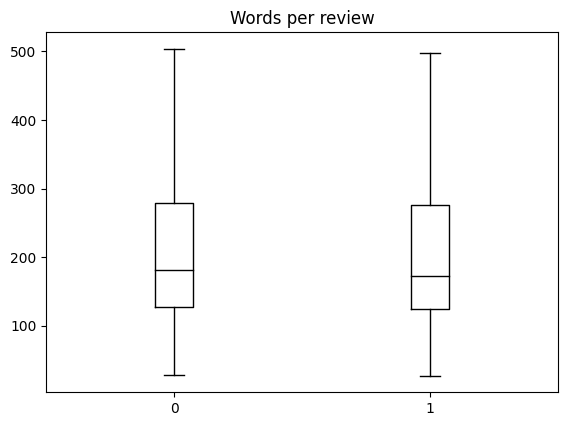

In [22]:
# create a box plot for understaning any pattern

df["Words per review"] = df["text"].str.split().apply(len)
df.boxplot("Words per review", by="label", grid=False, showfliers=False,
           color="black")
plt.suptitle("")
plt.xlabel("")
plt.show()

# we can able to see similar distribution for both

In [23]:
# 0 is negative
# 1 is positive
df[df.text.str.len() < 200]

,text,label,Words per review
9,One of my favorite scenes is at the beginning when guests on a private yacht decide to take an impromptu swim - in their underwear! Rather risqué for 1931!,1,29
141,"This is actually one of my favorite films, I would recommend that EVERYONE watches it. There is some great acting in it and it shows that not all ""good"" films are American....",1,32
494,"Brilliant execution in displaying once and for all, this time in the venue of politics, of how ""good intentions do actually pave the road to hell"". Excellent!",1,27
824,Allison Dean's performance is what stands out in my mind watching this film. She balances out the melancholy tone of the film with an iridescent energy. I would like to see more of her.,1,34
1079,A movie best summed up by the scene where a victim simulates disembowelment by pulling some poor animal's intestines out from under her T-shirt. Too terrible for words.,0,28
1390,"My favorite part of this film was the old man's attempt to cure his neighbor's ills by putting the strong medicine in his bath. There is more than a sense of family, there is a sense of community.",1,38
1576,"""Foxes"" is a great film. The four young actresses Jodie Foster, Cherie Currie, Marilyn Kagan and Kandice Stroh are wonderful. The song ""On the radio"" by Donna Summer is lovely. A great film. *****",1,34


In [24]:
imdb.reset_format()

## Tokenizer

In [25]:
from transformers import AutoTokenizer

checkpoint = "distilbert-base-cased"
#checkpoint = "bert-base-cased"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

def tokenize_function(batch):
    return tokenizer(batch["text"], padding=True, truncation=True)

# here we use map method to apply tokenization as one by one
imdb_encoded = imdb.map(tokenize_function, batched=True, batch_size=None)
imdb_encoded

tokenizer_config.json:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/465 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

Map:   0%|          | 0/1600 [00:00<?, ? examples/s]

Map:   0%|          | 0/400 [00:00<?, ? examples/s]

Map:   0%|          | 0/400 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 1600
    })
    test: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 400
    })
    validation: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 400
    })
})

In [26]:
print(imdb_encoded['train'][0])

{'text': "After Life is a Miracle, I did not expect much. It's hard to believe that these films were made by the same man as Do You Remember Dolly Bell, for instance. Zavet is two hours of silly antics with no story. The wild and unbridled humor of Underground seems to have degenerated into pathetic buffoonery here. It appears that Kusturica has been going steadily downhill since he started making life-affirming comedies, beginning with Black Cat, White Cat, which I think was great, but already had some disturbing signs of dementia. I liked his early films so much, and this is why it's especially disappointing to see something like this. Let's hope his next one will be great.", 'label': 0, 'input_ids': [101, 1258, 2583, 1110, 170, 16904, 117, 146, 1225, 1136, 5363, 1277, 119, 1135, 112, 188, 1662, 1106, 2059, 1115, 1292, 2441, 1127, 1189, 1118, 1103, 1269, 1299, 1112, 2091, 1192, 9498, 23549, 4720, 117, 1111, 5374, 119, 163, 8308, 1204, 1110, 1160, 2005, 1104, 10729, 2848, 6063, 1114, 

## Tiny IMDB

In [28]:
import transformers
import re
# here we are checking the available models
[x for x in dir(transformers) if re.search(r'^AutoModel', x)]
# since this is a classification task this falls under Automodel for Sequence classification

['AutoModel',
 'AutoModelForAudioClassification',
 'AutoModelForAudioFrameClassification',
 'AutoModelForAudioXVector',
 'AutoModelForCTC',
 'AutoModelForCausalLM',
 'AutoModelForDepthEstimation',
 'AutoModelForDocumentQuestionAnswering',
 'AutoModelForImageClassification',
 'AutoModelForImageSegmentation',
 'AutoModelForImageToImage',
 'AutoModelForInstanceSegmentation',
 'AutoModelForMaskGeneration',
 'AutoModelForMaskedImageModeling',
 'AutoModelForMaskedLM',
 'AutoModelForMultipleChoice',
 'AutoModelForNextSentencePrediction',
 'AutoModelForObjectDetection',
 'AutoModelForPreTraining',
 'AutoModelForQuestionAnswering',
 'AutoModelForSemanticSegmentation',
 'AutoModelForSeq2SeqLM',
 'AutoModelForSequenceClassification',
 'AutoModelForSpeechSeq2Seq',
 'AutoModelForTableQuestionAnswering',
 'AutoModelForTextEncoding',
 'AutoModelForTextToSpectrogram',
 'AutoModelForTextToWaveform',
 'AutoModelForTokenClassification',
 'AutoModelForUniversalSegmentation',
 'AutoModelForVideoClassificat

In [29]:
import torch
from transformers import AutoModelForSequenceClassification

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
num_labels = 2
model = (AutoModelForSequenceClassification
         .from_pretrained(checkpoint, num_labels=num_labels)
         .to(device))

model.safetensors:   0%|          | 0.00/263M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-cased and are newly initialized: ['pre_classifier.bias', 'classifier.weight', 'classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [30]:
from datasets import DatasetDict

tiny_imdb = DatasetDict()
tiny_imdb['train'] = imdb['train'].shuffle(seed=1).select(range(50))
tiny_imdb['validation'] = imdb['validation'].shuffle(seed=1).select(range(10))
tiny_imdb['test'] = imdb['test'].shuffle(seed=1).select(range(10))

tiny_imdb_encoded = tiny_imdb.map(tokenize_function, batched=True, batch_size=None)
tiny_imdb_encoded

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:   0%|          | 0/10 [00:00<?, ? examples/s]

Map:   0%|          | 0/10 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 50
    })
    validation: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 10
    })
    test: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 10
    })
})

In [32]:
! pip install transformers[torch]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.4/261.4 kB 6.5 MB/s eta 0:00:00


In [34]:
! pip install accelerate -U

In [35]:
from transformers import Trainer, TrainingArguments

batch_size = 8
logging_steps = len(tiny_imdb_encoded["train"]) // batch_size
model_name = f"{checkpoint}-finetuned-tiny-imdb"
training_args = TrainingArguments(output_dir=model_name,
                                  num_train_epochs=2,
                                  learning_rate=2e-5,
                                  per_device_train_batch_size=batch_size,
                                  per_device_eval_batch_size=batch_size,
                                  weight_decay=0.01,
                                  evaluation_strategy="epoch",
                                  disable_tqdm=False,
                                  logging_steps=logging_steps,
                                  log_level="error",
                                  optim='adamw_torch'
                                  )
training_args

ImportError: ignored

In [ ]:
from transformers import Trainer

torch.cuda.empty_cache()

trainer = Trainer(model=model,
                  args=training_args,
                  train_dataset=tiny_imdb_encoded["train"],
                  eval_dataset=tiny_imdb_encoded["validation"],
                  tokenizer=tokenizer)
trainer.train();

Epoch,Training Loss,Validation Loss
1,0.698100,0.673002
2,0.690900,0.675429


In [ ]:
preds = trainer.predict(tiny_imdb_encoded['test'])
preds

PredictionOutput(predictions=array([[-0.06958597,  0.08243475],
       [-0.07667492,  0.11690364],
       [-0.05978067,  0.05852588],
       [-0.05062508,  0.09085844],
       [-0.07219092,  0.10617454],
       [-0.08734367,  0.11028455],
       [-0.06684104,  0.08281732],
       [-0.07786269,  0.10676245],
       [-0.06891385,  0.09251334],
       [-0.08195043,  0.10885128]], dtype=float32), label_ids=array([0, 0, 1, 1, 0, 0, 0, 0, 1, 0]), metrics={'test_loss': 0.7379708886146545, 'test_runtime': 0.375, 'test_samples_per_second': 26.664, 'test_steps_per_second': 5.333})

In [ ]:
preds.predictions.shape

(10, 2)

In [ ]:
preds.predictions.argmax(axis=-1)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
preds.label_ids

array([0, 0, 1, 1, 0, 0, 0, 0, 1, 0])

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(preds.label_ids, preds.predictions.argmax(axis=-1))

0.3

In [ ]:
def get_accuracy(preds):
  predictions = preds.predictions.argmax(axis=-1)
  labels = preds.label_ids
  accuracy = accuracy_score(preds.label_ids, preds.predictions.argmax(axis=-1))
  return {'accuracy': accuracy}


In [ ]:
from transformers import Trainer

torch.cuda.empty_cache()

trainer = Trainer(model=model,
                  compute_metrics=get_accuracy,
                  args=training_args,
                  train_dataset=tiny_imdb_encoded["train"],
                  eval_dataset=tiny_imdb_encoded["validation"],
                  tokenizer=tokenizer)
trainer.train();

Epoch,Training Loss,Validation Loss,Accuracy
1,0.657800,0.671555,0.600000
2,0.658600,0.675788,0.600000


## Training run

In [ ]:
batch_size = 16
logging_steps = len(imdb_encoded["train"]) // batch_size
model_name = f"{checkpoint}-finetuned-imdb"
training_args = TrainingArguments(output_dir=model_name,
                                  num_train_epochs=2,
                                  learning_rate=2e-5,
                                  per_device_train_batch_size=batch_size,
                                  per_device_eval_batch_size=batch_size,
                                  weight_decay=0.01,
                                  evaluation_strategy="epoch",
                                  disable_tqdm=False,
                                  logging_steps=logging_steps,
                                  log_level="error",
                                  optim='adamw_torch'
                                  )

In [ ]:
from transformers import Trainer

torch.cuda.empty_cache()

trainer = Trainer(model=model,
                  args=training_args,
                  compute_metrics=get_accuracy,
                  train_dataset=imdb_encoded["train"],
                  eval_dataset=imdb_encoded["validation"],
                  tokenizer=tokenizer)
trainer.train();

Epoch,Training Loss,Validation Loss,Accuracy
1,0.461600,0.355774,0.862500
2,0.247800,0.343082,0.872500


In [ ]:


trainer.evaluate()

{'epoch': 2.0,
 'eval_accuracy': 0.895,
 'eval_loss': 0.3591071367263794,
 'eval_runtime': 13.6299,
 'eval_samples_per_second': 29.347,
 'eval_steps_per_second': 3.668}

In [ ]:
trainer.save_model()

In [ ]:
model_name

'bert-base-cased-finetuned-imdb'

In [ ]:
from transformers import pipeline
classifier = pipeline('text-classification', model=model_name)
classifier('This is not my idea of fun')

[{'label': 'LABEL_0', 'score': 0.9525713324546814}]

In [ ]:
classifier('This was beyond incredible')

[{'label': 'LABEL_1', 'score': 0.8722493052482605}]